In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [17]:
dt.datetime.now() - dt.timedelta(days=365*5)

datetime.datetime(2018, 2, 15, 16, 1, 48, 789090)

In [7]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()
ticker = "FREY"
stock_data = yf.Ticker(ticker)
stock_data.history()["Close"]

Date
2023-01-17    10.60
2023-01-18    10.55
2023-01-19     9.75
2023-01-20    10.18
2023-01-23    10.40
2023-01-24     9.90
2023-01-25     8.79
2023-01-26     8.73
2023-01-27     8.71
2023-01-30     8.51
2023-01-31     8.81
2023-02-01     9.13
2023-02-02     9.45
2023-02-03     9.00
2023-02-06     9.12
2023-02-07     9.15
2023-02-08     8.91
2023-02-09     8.49
2023-02-10     8.62
2023-02-13     8.62
2023-02-14     8.70
Name: Close, dtype: float64

In [8]:
log_return = np.log(stock_data.Close/stock_data.Close.shift(1).dropna())

AttributeError: 'Ticker' object has no attribute 'Close'

In [40]:
daily_std = log_return.std()

In [41]:
annualized_volatility = daily_std * np.sqrt(252)
annualized_volatility = annualized_volatility * 100

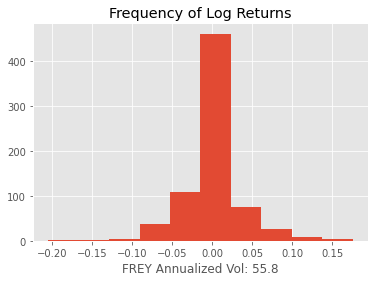

In [42]:
fig = plt.hist(log_return)
plt.title("Frequency of Log Returns")
plt.xlabel(ticker + " Annualized Vol: " + str(np.round(annualized_volatility, 1)))
plt.show()

<AxesSubplot:xlabel='Date'>

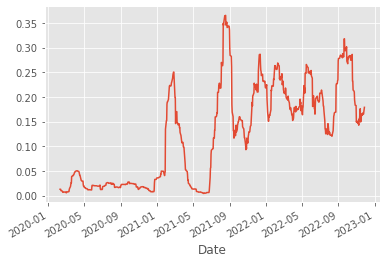

In [43]:
TRADING_DAYS = 20
volatility = log_return.rolling(window = TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot()

Text(0, 0.5, 'Sharpe Ratio')

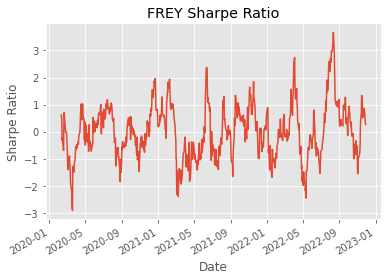

In [44]:
RISK_FREE_RATE = 0.04/252
rolling_sharpe = (log_return.rolling(window=TRADING_DAYS).mean() - RISK_FREE_RATE)*TRADING_DAYS/volatility
rolling_sharpe.plot()
plt.title('FREY Sharpe Ratio')
plt.ylabel("Sharpe Ratio")

In [14]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as plt
plt.style.use("ggplot")

def rolling_sharpe(start=dt.datetime(2016, 1, 1), end=dt.datetime.now(), ticker=None, window=20):
    
    RISK_FREE_RATE = yf.Ticker("^TYX").history()["Close"][-1] / 100 / 252
    # Gets closing prices of ticker for the past 
    close = yf.Ticker(ticker).history(start=start, end=end)["Close"]
    
    # Shifts closing prices by 1 day to get log returns; dropna drops the first value since there 
    # is no preceding number
    
    returns = close / close.shift(1).dropna()
    log_returns = np.log(returns)
    
    #Calculates standard deviation on an X rolling period and multiplies by sqrt to get volatility
    volatility = log_returns.rolling(window=window).std() * np.sqrt(window)
    
    #Calculate Rolling Sharpe
    sharpe = (log_returns.rolling(window=window).mean() - RISK_FREE_RATE) * window / volatility
    
    #Plots Rolling Sharpe with labels
    fig = sharpe.plot()
    fig.set_title(f"{ticker} Sharpe Ratio")
    fig.set_ylabel("Sharpe Ratio")    
    
    return fig

<AxesSubplot:title={'center':'MSFT Sharpe Ratio'}, xlabel='Date', ylabel='Sharpe Ratio'>

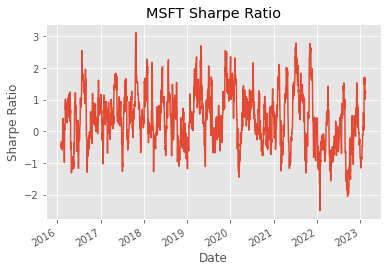

In [15]:
rolling_sharpe(ticker="MSFT")